In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [2]:
# reading data
# data is Zillow Home Value Index since 2000 for all the Metropolitan Areas in the US
df = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month_11.29.2020_.csv") 

In [3]:
# narrowing data data to the 100 most populous metropolitan areas in the US
for i in range(101,892):
    df=df.drop([i])

In [4]:
# for each top 100 Metro Area calculating price change over the past year and for the next year for each month from 2004 to 2016
past1y=[]
next1y=[]

for a in range(0,100):
    data=(df.loc[[a]])
    data=data.values.tolist()
    data=data[0]
    data = data[3:]
    for i in range(48,196):
        past1y.append((data[i]/data[i-12]-1)*100)
        next1y.append((data[i+12]/data[i]-1)*100)

In [5]:
# for each top 100 Metro Area calculating price change over the past 4 years and for the next 4 years for each month from 2004 to 2016
past4y=[]
next4y=[]

for a in range(0,100):
    data=(df.loc[[a]])
    data=data.values.tolist()
    data=data[0]
    data = data[3:]
    for i in range(48,196):
        past4y.append((data[i]/data[i-48]-1)*100)
        next4y.append((data[i+48]/data[i]-1)*100)

In [6]:
# converting the lists into dataframes and combining all the dataframes together then dropping any rows with missing values
df1y=pd.DataFrame(past1y)
df4y=pd.DataFrame(past4y)
nxt4y=pd.DataFrame(next4y)

result = pd.concat([df1y,df4y,nxt4y],axis=1)
result=result.dropna()
result.columns = ['p1', 'p4','n4']

In [9]:
x=result.drop(["n4"],axis=1).values
y=result["n4"].values

In [10]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(x_train, y_train)

In [12]:
y_pred=regr.predict(x_test)
print(y_pred)

[ 10.1152994  -29.57244464 -10.7570595  ...   4.20361698   1.0772063
  13.71361804]


In [13]:
# printing the r^2 of the correlation between the test data on the model's predictions
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.633425639240101

Text(0, 0.5, 'predicted')

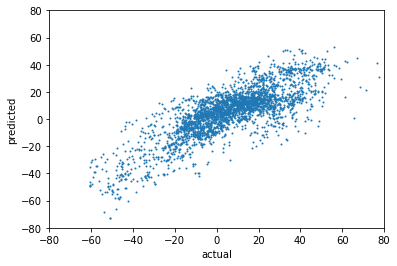

In [14]:
# plotting the test data vs the model's predctions made about it
plt.scatter(y_test,y_pred,s=1)
plt.xlim(-80, 80)
plt.ylim(-80, 80)
plt.xlabel("actual")
plt.ylabel("predicted")

In [15]:
print(df)

          RegionName RegionType StateName  1/31/2000  2/29/2000  3/31/2000  \
0       New York, NY        msa        NY   223829.0   225167.0   226370.0   
1    Los Angeles, CA        msa        CA   229755.0   230555.0   231780.0   
2        Chicago, IL        msa        IL   168751.0   169149.0   169664.0   
3         Dallas, TX        msa        TX   129057.0   129160.0   129246.0   
4        Houston, TX        msa        TX   126120.0   126198.0   126079.0   
..               ...        ...       ...        ...        ...        ...   
96    Harrisburg, PA        msa        PA   116214.0   116612.0   116921.0   
97       Spokane, WA        msa        WA   128480.0   128462.0   128477.0   
98   Chattanooga, TN        msa        TN   105549.0   105845.0   106018.0   
99      Scranton, PA        msa        PA    80281.0    80798.0    81008.0   
100      Modesto, CA        msa        CA   147064.0   147417.0   148011.0   

     4/30/2000  5/31/2000  6/30/2000  7/31/2000  ...  1/31/2022

In [29]:
# Sacremento is expectated to have its Zillow Home Value Index increase by 0.69% over the next 4 years
print(df["RegionName"][25])
Sacramento=(df.loc[25])
p1=((Sacramento[276]/Sacramento[264]-1)*100)
p4=((Sacramento[276]/Sacramento[228]-1)*100)

print("Next 4 Years projected")
regr.predict([[p1,p4]])

Sacramento, CA
Next 4 Years projected


array([0.68636512])

In [30]:
# Kansas City is expectated to have its Zillow Home Value Index increase by 9.49% over the next 4 years
print(df["RegionName"][30])
KansasCity=(df.loc[30])
p1=((KansasCity[276]/KansasCity[264]-1)*100)
p4=((KansasCity[276]/KansasCity[228]-1)*100)

print("Next 4 Years projected")
regr.predict([[p1,p4]])

Kansas City, MO
Next 4 Years projected


array([9.48691876])

In [31]:
# Nashville is expectated to have its Zillow Home Value Index decrease by 11.42% over the next 4 years
print(df["RegionName"][35])
Nashville=(df.loc[35])
p1=((Nashville[276]/Nashville[264]-1)*100)
p4=((Nashville[276]/Nashville[228]-1)*100)

print("Next 4 Years projected")
regr.predict([[p1,p4]])

Nashville, TN
Next 4 Years projected


array([-11.42261499])

In [37]:
# Boise is expectated to have its Zillow Home Value Index decrease by 51.84% over the next 4 years
print(df["RegionName"][76])
Boise=(df.loc[76])
p1=((Boise[276]/Boise[264]-1)*100)
p4=((Boise[276]/Boise[228]-1)*100)

print("Next 4 Years projected")
regr.predict([[p1,p4]])

Boise City, ID
Next 4 Years projected


array([-51.84461694])